In [3]:
#Este projeto pretende, recorrendo aos algoritmos de aprendizagem máquina e data mining, prever as florestas com maior área queimada tendo em conta as condições meteorológicas e outros critérios de classificação na deteção de incêndios.
#Pretende-se com a análise deste projeto que seja possível a adoção de sensores nas florestas para a monitorização das mesmas bem como prestar, posteriormente, através deles, medidas que ajudem a reduzir a probabilidade de incêndio nas áreas mais críticas (e menos críticas).


In [4]:
#Motivação
#A aplicação prática dos conceitos abordados neste documento permite que este sistema possa ser adotado, em condições reais, como um recurso auxiliar na prevenção e deteção de incêndios, em Portugal.
#Objetivos
#O objetivo deste projeto reside em prever as áreas com histórico de maior área queimada(isto é, se queimou ou não), tendo em conta as condições meteorologias e temporais associadas às suas localizações. 

In [5]:
#Estado da Arte
#Os conhecimentos atuais na área de aprendizagem máquina e data mining [1], assim como as crescentes capacidades das ferramentas associadas, facilitam o desenvolvimento da solução proposta.
#Desta forma, torna-se possível uma ligeira abstração do que consiste a implementação (código) e um maior foco no campo conceitual.
#Alguns projetos listados em [3], [4] sugerem propostas de resolução de implementação e aplicação em muitos contextos, podendo ser aplicado parte dela no meu também.

In [6]:
#Descrição do trabalho
#Foi desenvolvido um script (ficheiro anexado como script.py) para modificar alguns dados provenientes do dataset original [4].
#As mudanças mais importantes de salientar consiste na atribuição de valores inteiros às colunas “day” e “month” que originalmente se encontravam com valores de string.
#Foi adicionado uma nova coluna de output, “burntarea” que representa se a área de floresta com as suas coordenadas associadas ardeu ou não, tendo associado dois valores booleanas 0 – não e 1 – sim.

In [7]:
#reads the information
#import pandas
#data = pandas.read_csv('forestfires.csv')
#Load and describe data: 
#MISSING VALUE TREATMENT
#print(data.isna().sum().sum())
#Create a new column
#data["burntarea"] = " "
#Fill the column with data
#x = (data.area == 0).empty
#data["burntarea"] = ["yes" if i > x else "no" for i in data.area]

##PreProcessing
## Encode Data
#data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
#data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

#data= data.drop(['area'],axis=1)
#save to the file 
#data.to_csv("forestfires.csv", index=False)

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fire-detection/training.csv
/kaggle/input/fire-detection/test.csv


In [9]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

train = pd.read_csv('../input/fire-detection/training.csv')
test = pd.read_csv('../input/fire-detection/test.csv')

In [10]:
#Após este processamento da informação, efetuou-se a divisão do dataset com 400 entradas para os exemplos de treino (“train”) e as restantes 117 entradas para os exemplos de test (“test”).

In [11]:
train.shape

(400, 13)

In [12]:
test.shape

(117, 13)

In [13]:
#Numa fase seguinte, junta-se os exemplos de treino e teste numa lista única de forma a uniformizar os dados.

In [14]:
data_list = [train, test]
data = train.append(test, sort=False)
df = pd.DataFrame(data)
train.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,burntarea
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,no
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,no
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,no
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,no
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,no
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,no
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,no
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,no
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,no
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,no


In [15]:
#Posteriormente, é efetuado um mapeamento dos valores associados à classe atributo, “burntarea”, para valores booleanos. 

In [16]:
burntareamapping = {'no' : 0, 'yes': 1}
train['burntarea'] = train['burntarea'].map(burntareamapping)
test['burntarea'] = test['burntarea'].map(burntareamapping)
train.head(20)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,burntarea
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0


In [17]:
#De seguida, é feito uma agrupação da informação em valores numéricos uma vez que muitos classificadores não lidam bem com strings e de forma a reduzir os valores a serem utilizados pelos algoritmos. 
#A resolução passa por uma agrupação em intervalos tendo em conta o atributo, temperatura “temp” e depois é aplicado o mesmo raciocínio para o atributo, humidade, “RH”. 
#Nível médio da temperatura reside nos intervalos de valores [2.2, 33.30], portanto, a divisão foi a seguinte.
#Se for menor ou igual a 5, é atribuído o valor 0.
#Se for maior que 5 e menor ou igual a 15, é atribuído o valor 1.
#Se for maior que 15 e menor ou igual a 25, é atribuído o valor 2.
#Se for maior que 25, é atribuído o valor 3.


In [18]:
for ds in data_list:
    ds.loc[ ds['temp'] <= 5, 'temp'] = 0
    ds.loc[(ds['temp'] > 5) & (ds['temp'] <= 15), 'temp'] = 1
    ds.loc[(ds['temp'] > 15) & (ds['temp'] <= 25), 'temp'] = 2
    ds.loc[ ds['temp'] > 25, 'temp'] = 3
    
train.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,burntarea
0,7,5,3,5,86.2,26.2,94.3,5.1,1.0,51,6.7,0.0,0
1,7,4,10,2,90.6,35.4,669.1,6.7,2.0,33,0.9,0.0,0
2,7,4,10,6,90.6,43.7,686.9,6.7,1.0,33,1.3,0.0,0
3,8,6,3,5,91.7,33.3,77.5,9.0,1.0,97,4.0,0.2,0
4,8,6,3,7,89.3,51.3,102.2,9.6,1.0,99,1.8,0.0,0
5,8,6,8,7,92.3,85.3,488.0,14.7,2.0,29,5.4,0.0,0
6,8,6,8,1,92.3,88.9,495.6,8.5,2.0,27,3.1,0.0,0
7,8,6,8,1,91.5,145.4,608.2,10.7,1.0,86,2.2,0.0,0
8,8,6,9,2,91.0,129.5,692.6,7.0,1.0,63,5.4,0.0,0
9,7,5,9,6,92.5,88.0,698.6,7.1,2.0,40,4.0,0.0,0


In [19]:
#Aplicando o mesmo raciocínio ao atributo humidade, “RH”:
#Nível médio da humidade reside nos intervalos de valores [15.0, 100], portanto, a divisão foi a seguinte.
#•Se for menor ou igual a 30, é atribuído o valor 0.
#•Se for maior que 30 e menor ou igual a 70, é atribuído o valor 1.
#•Se for maior que 70 e menor ou igual a 90, é atribuído o valor 2.
#•Se for maior que 90, é atribuído o valor 3.


In [20]:
for ds in data_list:
    ds.loc[ ds['RH'] <= 30, 'RH'] = 0
    ds.loc[(ds['RH'] > 30) & (ds['RH'] <= 70), 'RH'] = 1
    ds.loc[(ds['RH'] > 70) & (ds['RH'] <= 90), 'RH'] = 2
    ds.loc[ ds['RH'] > 90, 'RH'] = 3
    
train.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,burntarea
0,7,5,3,5,86.2,26.2,94.3,5.1,1.0,1,6.7,0.0,0
1,7,4,10,2,90.6,35.4,669.1,6.7,2.0,1,0.9,0.0,0
2,7,4,10,6,90.6,43.7,686.9,6.7,1.0,1,1.3,0.0,0
3,8,6,3,5,91.7,33.3,77.5,9.0,1.0,3,4.0,0.2,0
4,8,6,3,7,89.3,51.3,102.2,9.6,1.0,3,1.8,0.0,0
5,8,6,8,7,92.3,85.3,488.0,14.7,2.0,0,5.4,0.0,0
6,8,6,8,1,92.3,88.9,495.6,8.5,2.0,0,3.1,0.0,0
7,8,6,8,1,91.5,145.4,608.2,10.7,1.0,2,2.2,0.0,0
8,8,6,9,2,91.0,129.5,692.6,7.0,1.0,1,5.4,0.0,0
9,7,5,9,6,92.5,88.0,698.6,7.1,2.0,1,4.0,0.0,0


In [21]:
#Numa fase posterior, alguns testes de visualização dos dados, em gráficos foram feitos de forma a ajudar a análise dos valores dos exemplos de treino.

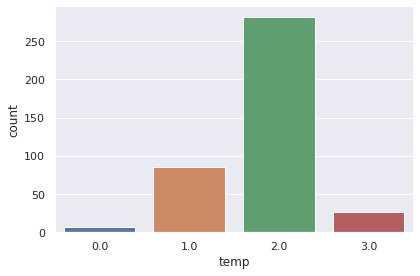

In [22]:
sns.countplot(x = 'temp', data=train)
sns.despine()
plt.tight_layout()

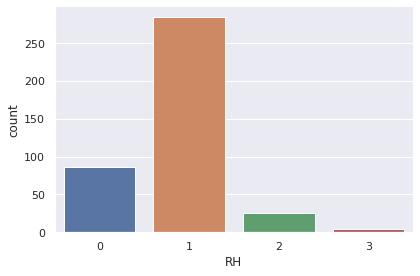

In [23]:
sns.countplot(x = 'RH', data=train)
sns.despine()
plt.tight_layout()

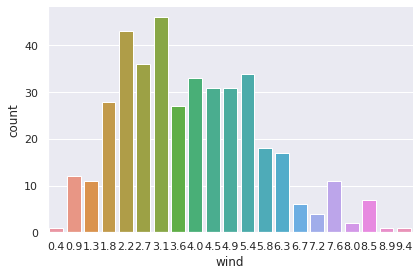

In [24]:
sns.countplot(x = 'wind', data=train)
sns.despine()
plt.tight_layout()

(array([198.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 202.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

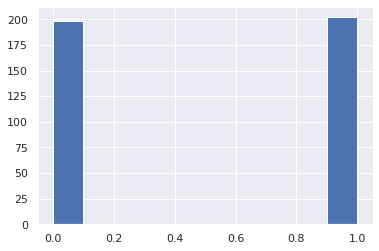

In [25]:
plt.hist((train.burntarea))

In [26]:
#Este histograma, serve como exemplo, para verificar no exemplo de treino, 
#a diferença da área ardida com a area não ardida.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f940cfae9d0>,
      dtype=object)

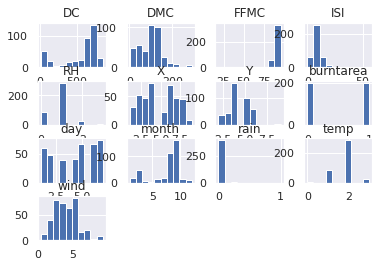

In [27]:
train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f940c864290>,
      dtype=object)

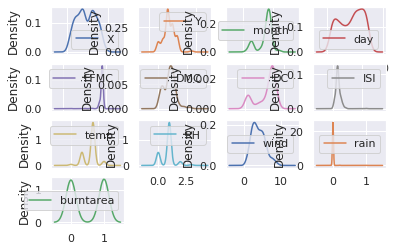

In [28]:
train.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

In [29]:
#Demonstrações das correlações, quer de forma mais especifica, quer de
#forma mais genérica.

In [30]:
print("Correlation:", train.corr(method='pearson'))

Correlation:                   X         Y     month       day      FFMC       DMC  \
X          1.000000  0.521109 -0.051769  0.005909 -0.003609 -0.057643   
Y          0.521109  1.000000 -0.095344 -0.002780 -0.091610 -0.092873   
month     -0.051769 -0.095344  1.000000 -0.078702  0.278936  0.493434   
day        0.005909 -0.002780 -0.078702  1.000000 -0.025142  0.070171   
FFMC      -0.003609 -0.091610  0.278936 -0.025142  1.000000  0.390794   
DMC       -0.057643 -0.092873  0.493434  0.070171  0.390794  1.000000   
DC        -0.072876 -0.169896  0.880619 -0.030163  0.321050  0.675163   
ISI        0.048798 -0.049172  0.184890  0.114408  0.481908  0.368848   
temp      -0.005102 -0.037907  0.291954  0.063352  0.343419  0.404711   
RH         0.058879  0.025507 -0.083974  0.068373 -0.279388  0.062553   
wind       0.018158 -0.025847 -0.055302  0.002551 -0.037192 -0.137668   
rain       0.073743  0.015495 -0.011095  0.060760  0.015171  0.074418   
burntarea  0.083919  0.077824  0.18635

In [31]:
#A conclusão dos seguintes dados é que a temperatura "temp" tem a correlação mais elevada
#com as áreas ardidas (correlação positiva), seguindo da humidade, "RH". 
#A chuva "rain" tem a menor correlação.

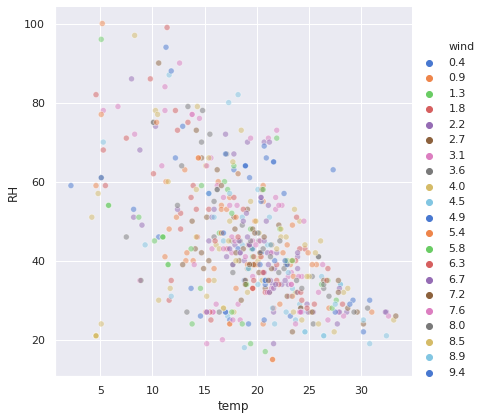

In [32]:
sns.relplot(x="temp", y="RH", hue="wind",sizes=(40, 400), alpha=.5, palette="muted",height=6, data=df)
plt.show()

In [33]:
#Com este gráfico, pode-se concluir que o atributo temperatura “temp” tem uma correlação elevada com o atributo vento, quando ambos possuem altos níveis, seguindo do atributo da humidade, “RH”, quando este possui valores mais baixos.

[Text(0, 0, 'X'),
 Text(0, 0, 'Y'),
 Text(0, 0, 'month'),
 Text(0, 0, 'day'),
 Text(0, 0, 'FFMC'),
 Text(0, 0, 'DMC'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'ISI'),
 Text(0, 0, 'temp'),
 Text(0, 0, 'RH'),
 Text(0, 0, 'wind'),
 Text(0, 0, 'rain'),
 Text(0, 0, 'burntarea')]

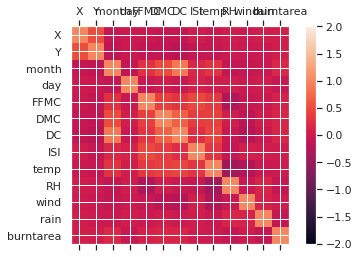

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(train.corr(), vmin=-2, vmax=2)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train.columns)
ax.set_yticklabels(train.columns)

In [35]:
#Este gráfico permite verificar as correlações existentes, de forma mais geral, ao contrário do anterior.
#Por exemplo, entre humidade e a temperatura existe uma solidificação de cor mais escura, demonstrado que
#ambas estão relacionadas.
#Por exemplo, o vento e a humidade também se encontram com altas correlações.

In [36]:
#Após a recolha destas informações, existiu a necessidade de remover (“drop”) as coluna “burntarea” dos exemplos de treino e de test, de forma a eliminar valores vazios.

In [37]:
train_data = train.drop('burntarea', axis=1)
test_out = test.drop('burntarea', axis=1)
target = train['burntarea']

In [ ]:
#Recorreu-se à validação cruzada, dado o tamanho razoável dos valores do dataset e a necessidade de obtenção de valores mais realísticos e precisos.  Manteve-se o algoritmo de validação cruzada “cross validation”, com k = 10 (o dataset é dividido em dez conjuntos distintos e um conjunto à vez é selecionado para o test e os restantes para o treino.
#A validação cruzada ajuda na verificação do desempenho do classificador “DecisionTreeClassifier”, que proporciona uma melhor noção do desempenho do mesmo quando exemplos de testes são utilizados.

In [ ]:
#O classificador “DecisionTreeClassifier” consiste numa implementação caixa-branca onde é possível a visualização do modelo (representado por uma árvore) gerado, tendo uma aprendizagem supervisionada.

In [38]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.45  0.625 0.6   0.5   0.725 0.5   0.675 0.575 0.625 0.525]


In [39]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.58 (+/- 0.16)


In [40]:
#Target Set

In [41]:
clf.fit(train_data, target)
pred=clf.predict(test_out)
print(pred)

[0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 1 1]


In [42]:
#Após a obtenção dos resultados do array é possível o mapeamento da informação obtida com a do teste, sendo possível a comparação dos resultados entre k_fold e usar diretamente o dataset de 400 entradas, sendo resultados parecidos ao da validação cruzada.

In [43]:
count = 0
for k in range(0,test["burntarea"].size):
    if test["burntarea"][k]==pred[k]:
        count=count+1

print("Score for test dataset with "+str(test["burntarea"].size)+" entries:")
print(count/test["burntarea"].size)

Score for test dataset with 117 entries:
0.5128205128205128


In [44]:
#Os dados disponibilizados pela árvore permitem perceber as amostras, ou seja, as amostras (“samples”) que chegam aos nós e aos respetivos valores divididos pelos nós.

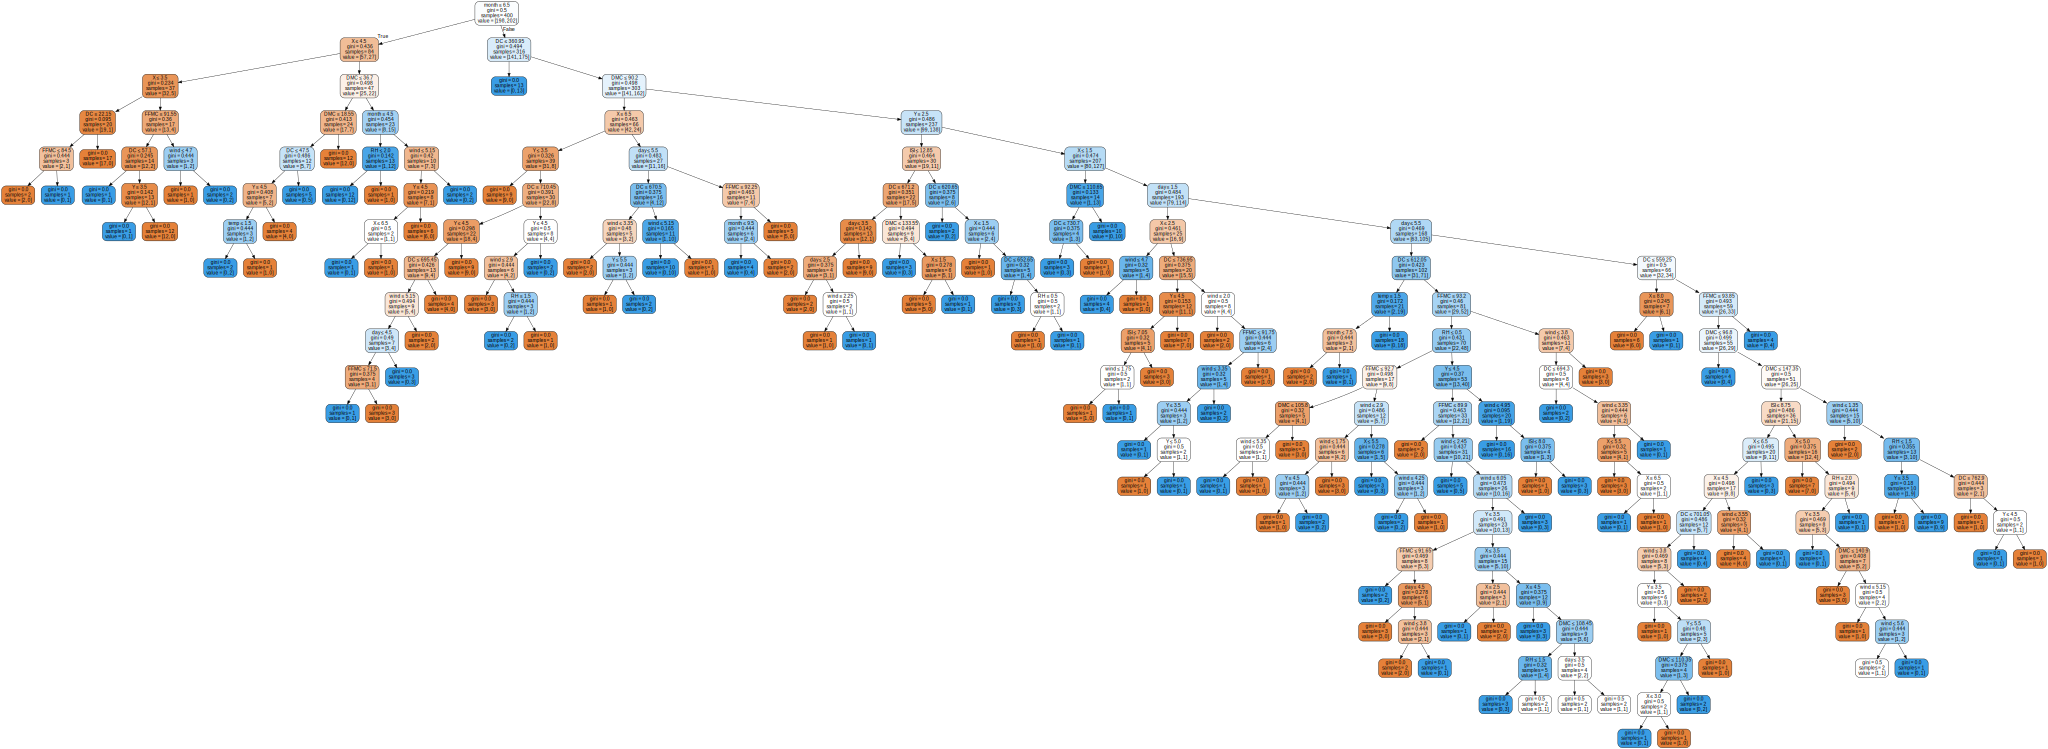

In [45]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=train_data.columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [46]:
#Este classificador assume que a presença de um recurso específico de uma determinada classe não está interligada à presença de outro recurso, possuindo uma aprendizagem supervisionada.
#Consiste num classificador que possui independência entre os atributos, isto é, todas as propriedades contribuem independentemente para a probabilidade.

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
x_train = pd.get_dummies(train[["temp","RH","wind"]])
y_train = pd.DataFrame(train['burntarea'])
x_test = pd.get_dummies(test[["temp","RH","wind"]])

print(x_train.info())
print(x_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    400 non-null    float64
 1   RH      400 non-null    int64  
 2   wind    400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB
None
   temp  RH  wind
0   1.0   1   6.7
1   2.0   1   0.9
2   1.0   1   1.3
3   1.0   3   4.0
4   1.0   3   1.8


In [48]:
#Associado ao classificador, encontra-se o modelo Gaussian onde a informação é formatada como solicita a informação. 
#Na chamada do modelo, é possível efetuar o “fit” para prever os resultados, no entanto, é necessário um ajuste do output do exemplos de treino para respeitar as regras do modelo Gaussian.

In [49]:
model = GaussianNB()

scoring = 'accuracy'
score = cross_val_score(model, x_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring=scoring)
print("Score with nb:")
print(score)

Score with nb:
[0.475 0.5   0.625 0.5   0.45  0.6   0.575 0.575 0.55  0.6  ]


In [50]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.55 (+/- 0.11)


In [51]:
model.fit(x_train, y_train.values.ravel())

predicted= model.predict(x_test)
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 1]


In [52]:
count = 0
for k in range(0,test["burntarea"].size):
    if test["burntarea"][k]==predicted[k]:
        count=count+1

print("Score for test dataset with "+str(test["burntarea"].size)+" entries:")
print(count/test["burntarea"].size)

Score for test dataset with 117 entries:
0.5384615384615384


In [53]:
#Classificador Instance Based compara novos problemas com aqueles que recebeu no treino, classificador que não estabelece generalizações.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
score = cross_val_score(nbrs, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print('\nScore with nbrs:')
print(score)


Score with nbrs:
[0.525 0.625 0.575 0.625 0.6   0.6   0.65  0.525 0.575 0.525]


In [55]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.58 (+/- 0.09)


In [56]:
model.fit(x_train, y_train.values.ravel())

predicted= model.predict(x_test)
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 1]


In [57]:
count = 0
for k in range(0,test["burntarea"].size):
    if test["burntarea"][k]==pred[k]:
        count=count+1

print("Score for test dataset with "+str(test["burntarea"].size)+" entries:")
print(count/test["burntarea"].size)

Score for test dataset with 117 entries:
0.5128205128205128


In [58]:
#Classificador ideal para grandes espaços dimensionais, consistindo num classificador com aprendizagem supervisionada.

In [59]:
from sklearn import svm

result = svm.SVC(gamma='auto')
score = cross_val_score(result, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score with svm:\n")
print(score)


Score with svm:

[0.5   0.575 0.5   0.525 0.6   0.55  0.65  0.6   0.625 0.475]


In [60]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.56 (+/- 0.11)


In [65]:
model.fit(x_train, y_train.values.ravel())

predicted= model.predict(x_test)
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 1]


In [66]:
count = 0
for k in range(0,test["burntarea"].size):
    if test["burntarea"][k]==pred[k]:
        count=count+1

print("Score for test dataset with "+str(test["burntarea"].size)+" entries:")
print(count/test["burntarea"].size)

Score for test dataset with 117 entries:
0.5128205128205128


In [ ]:
#Este classificador consiste numa implementação black-box, tendo uma aprendizagem supervisionada. 
#Em teoria, não é o classificador mais adequado para o problema apresentado tendo em conta que apresenta maiores complexidades no ajuste de Hiper parâmetros.

In [61]:

from sklearn.neural_network import MLPClassifier
clfneural = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
scoring = 'accuracy'
score = cross_val_score(clfneural, x_train, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring=scoring)
print("Score:")
print(score)

Score:
[0.5   0.625 0.5   0.55  0.35  0.525 0.575 0.575 0.525 0.475]


In [62]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.52 (+/- 0.14)


In [63]:
clfneural.fit(x_train, y_train.values.ravel())
pred=clfneural.predict(x_test)
print(pred)

[1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0
 1 1 1 0 1 0]


In [64]:
count = 0
for k in range(0,test["burntarea"].size):
    if test["burntarea"][k]==pred[k]:
        count=count+1

print("Score for test dataset with "+str(test["burntarea"].size)+" entries:")
print(count/test["burntarea"].size)

Score for test dataset with 117 entries:
0.5128205128205128
